In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
N_CLASSES = len(np.unique(y_train))
BATCH_SIZE = 32

In [4]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title,fontsize=100)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

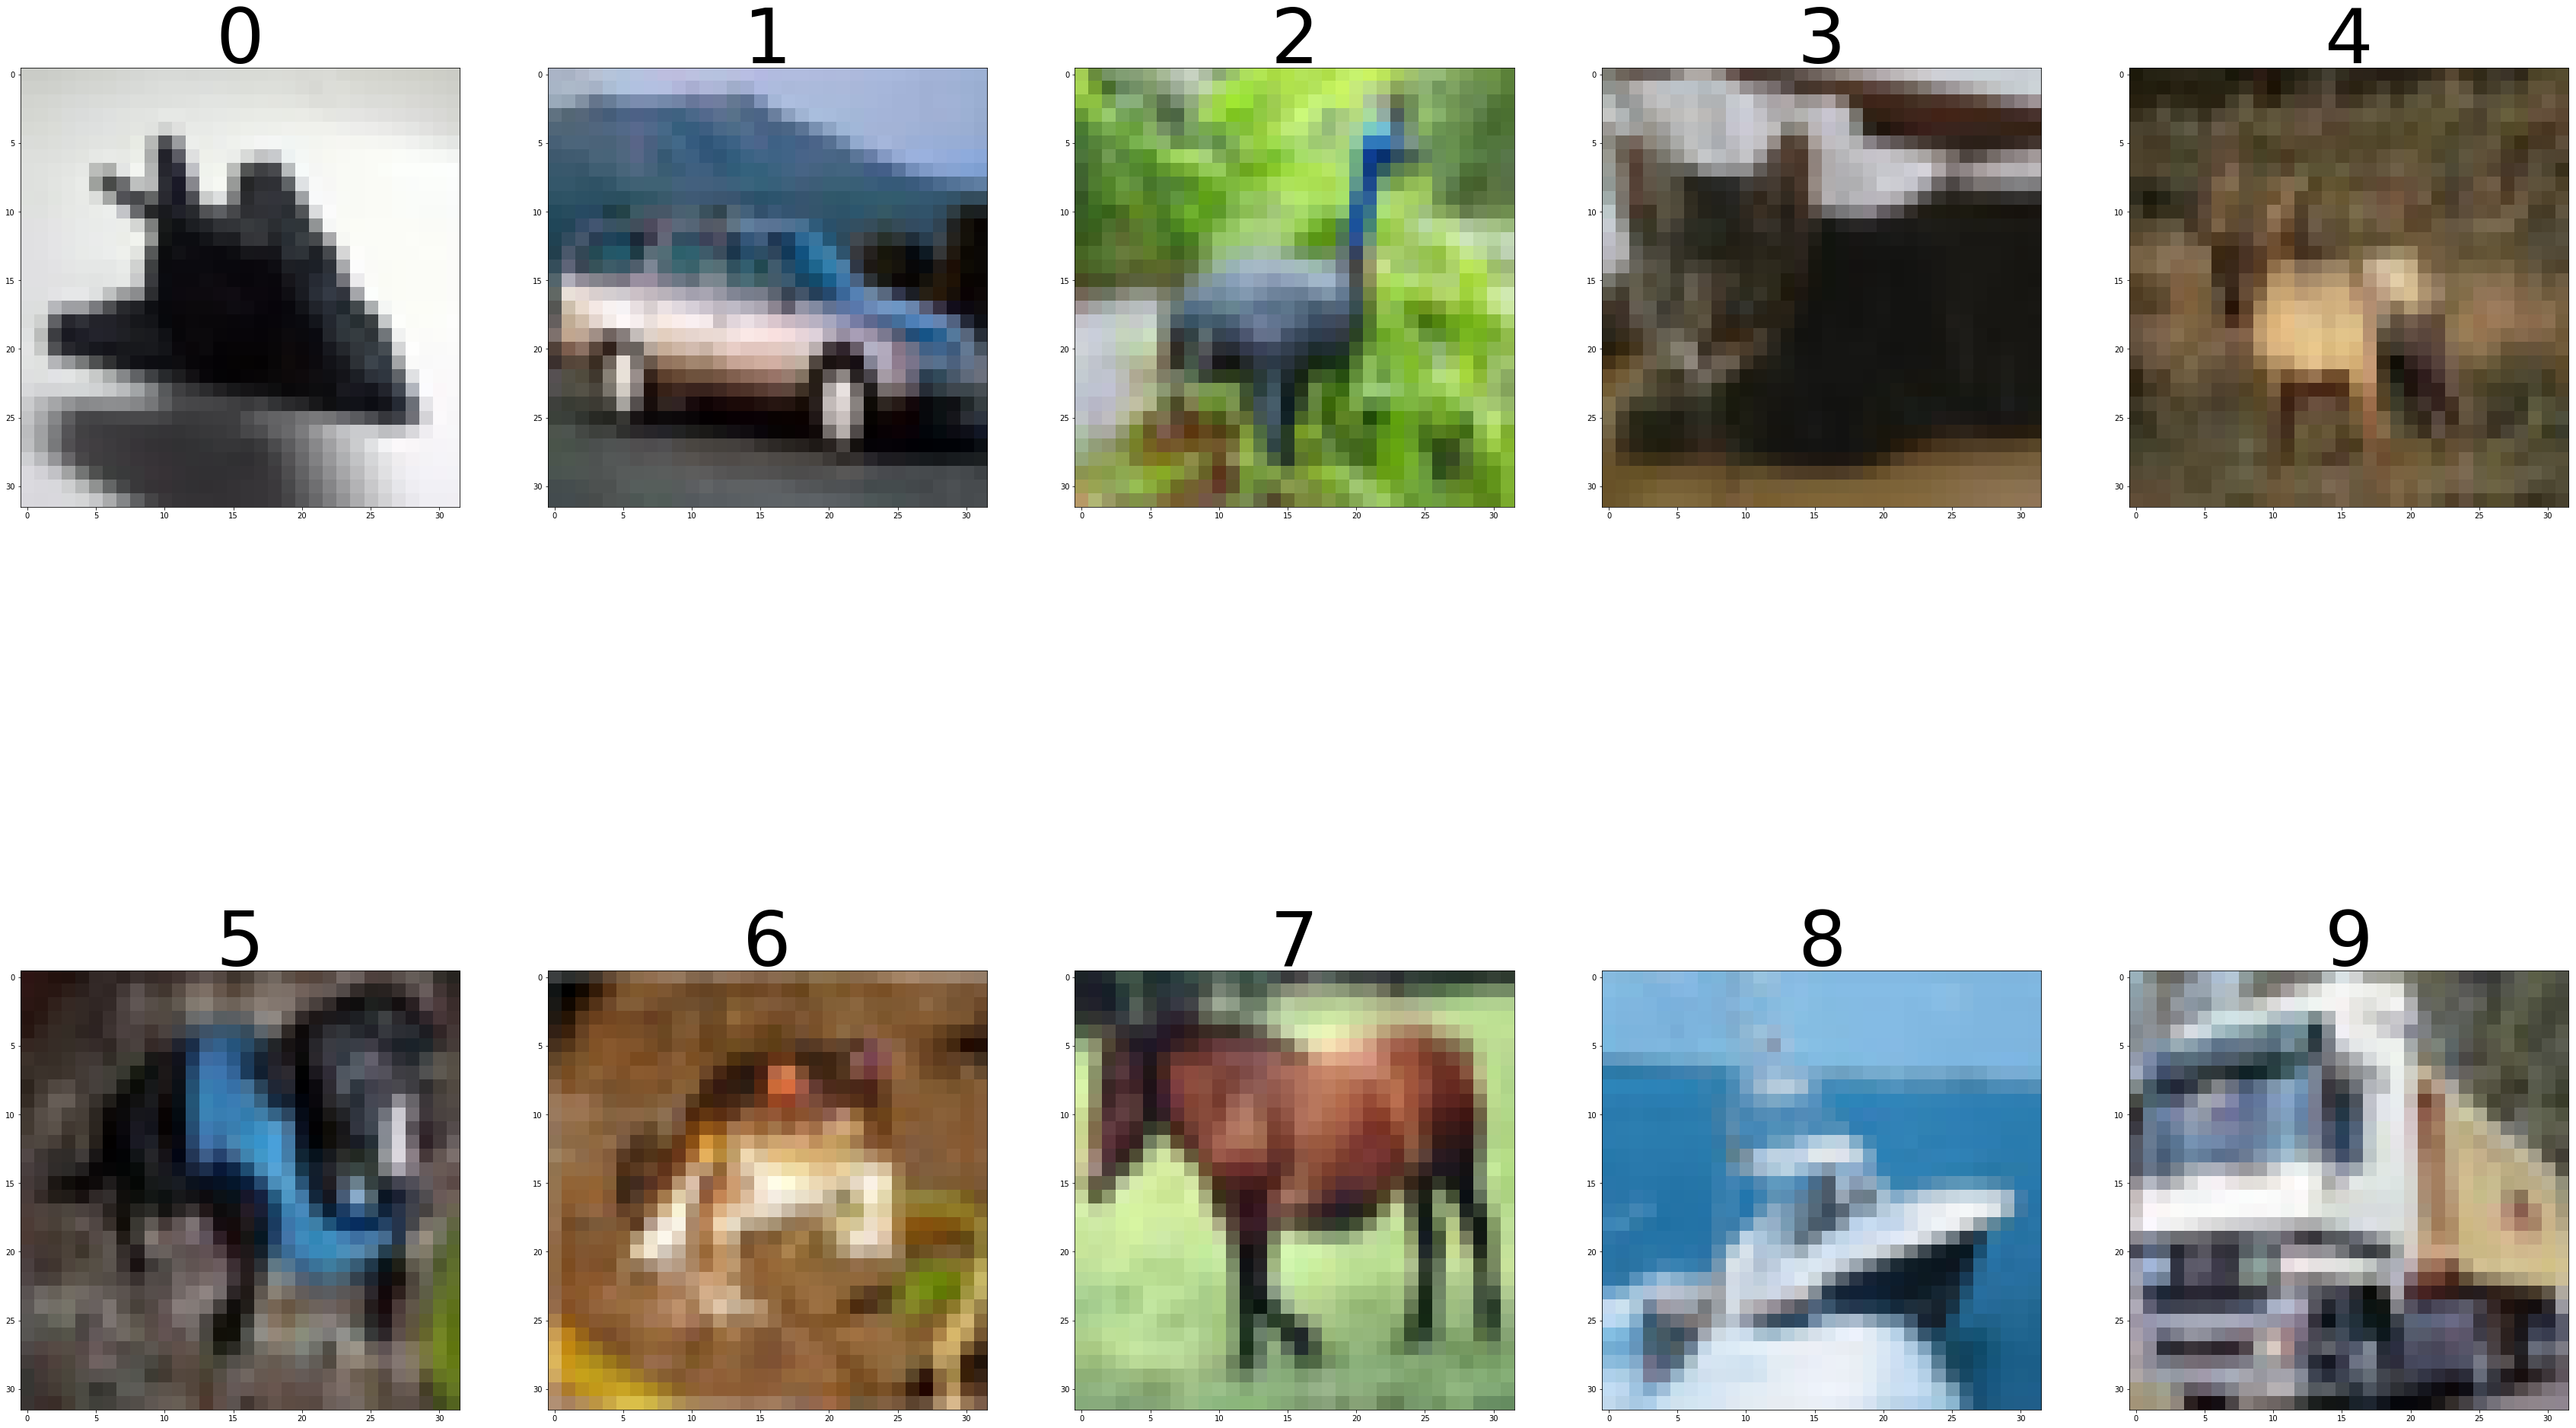

In [5]:
sample_images = []
for i in range(N_CLASSES):
    idx = np.where(y_train==i)[0][0]
    sample_images.append(x_train[idx])
show_images(sample_images, cols=2, titles=list(range(N_CLASSES)))

In [6]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, N_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, N_CLASSES)

def input_fn():
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(100000)
    train_dataset = train_dataset.batch(BATCH_SIZE)
    train_dataset = train_dataset.repeat()
    return train_dataset

In [8]:
inputs = tf.keras.Input(shape=(32,32,3))

flatten = layers.Flatten()(inputs) # shape (None, 32*32*3)
fc1 = layers.Dense(128, activation='relu')(flatten) # shape (None, 128)
fc2 = layers.Dense(128, activation='relu')(fc1) # shape (None, 128)
outputs = layers.Dense(N_CLASSES, activation='softmax')(fc2) # shape (None, N_CLASSES)

model = tf.keras.Model(inputs, outputs)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(optimizer=tf.train.RMSPropOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
strategy = tf.contrib.distribute.MirroredStrategy()
config = tf.estimator.RunConfig(train_distribute=strategy)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Device is available but not used by distribute strategy: /device:CPU:0
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_GPU:0
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_GPU:1
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_GPU:2
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_CPU:0
INFO:tensorflow:Configured nccl all-reduce.
INFO:tensorflow:Initializing RunConfig with distribution strategies.
INFO:tensorflow:Not using Distribute Coordinator.


In [13]:
keras_estimator = tf.keras.estimator.model_to_estimator(keras_model=model,
                                                        config=config,
                                                        model_dir='model_dir')

INFO:tensorflow:Using the Keras model provided.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Using config: {'_evaluation_master': '', '_protocol': None, '_num_worker_replicas': 1, '_tf_random_seed': None, '_task_type': 'worker', '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_distribute_coordinator_mode': None, '_save_checkpoints_secs': 600, '_train_distribute': <tensorflow.contrib.distribute.python.mirrored_strategy.MirroredStrategy object at 0x7fe9ab8e4668>, '_master': '', '_experimental_distribute': None, '_eval_distribute': None, '_is_chief': True, '_model_dir': 'model_dir', '_task_id': 0, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_device_fn': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe9ab8e4748>, '_serv

In [15]:
keras_estimator.train(input_fn=input_fn, steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:batch_all_reduce invoked for batches size = 6 with algorithm = nccl, num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='model_dir/keras/keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})
INFO:tensorflow:Warm-starting from: ('model_dir/keras/keras_model.ckpt',)
INFO:tensorflow:Warm-starting variable: dense/bias; prev_var_name: Unchanged
INFO:tensorflow:Warm-starting variable: dense_2/bias; prev_var_name: Unchanged
INFO:tensorflow:Warm-starting variable: dense/kernel; prev_var_name: Unchanged
INFO:tensorflow:Warm-starting variable: dense_1/bias; prev_var_name: Unchanged
INFO:tensorflo

INFO:tensorflow:global_step/sec: 168.461
INFO:tensorflow:loss = 1.6011999, step = 7200 (0.594 sec)
INFO:tensorflow:global_step/sec: 87.4902
INFO:tensorflow:loss = 1.337301, step = 7300 (1.145 sec)
INFO:tensorflow:global_step/sec: 169.801
INFO:tensorflow:loss = 1.3552926, step = 7400 (0.587 sec)
INFO:tensorflow:global_step/sec: 169.715
INFO:tensorflow:loss = 1.442297, step = 7500 (0.590 sec)
INFO:tensorflow:global_step/sec: 161.765
INFO:tensorflow:loss = 1.4703249, step = 7600 (0.618 sec)
INFO:tensorflow:global_step/sec: 168.006
INFO:tensorflow:loss = 1.3638668, step = 7700 (0.594 sec)
INFO:tensorflow:global_step/sec: 76.8396
INFO:tensorflow:loss = 1.4990909, step = 7800 (1.304 sec)
INFO:tensorflow:global_step/sec: 166.836
INFO:tensorflow:loss = 1.407742, step = 7900 (0.597 sec)
INFO:tensorflow:global_step/sec: 164.21
INFO:tensorflow:loss = 1.526664, step = 8000 (0.609 sec)
INFO:tensorflow:global_step/sec: 163.847
INFO:tensorflow:loss = 1.2811117, step = 8100 (0.610 sec)
INFO:tensorflow